In [1]:
from pathlib import Path
import joblib
import random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import sys
sys.path.append('..')
from utils.planar_utils import load_planar_dataset

# TRAIN A LOGISTIC REGRESSION

## helper functions

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## load data

In [3]:
# ## CATVSNONCAT DATASET ##
# ###########################
# def load_data():
#     """
#     Load the train and test set.

#     Returns:
#         - (X_train, Y_train, X_test, Y_test)
#     """

#     path = Path('./data/catvnoncat/data.pkl')
#     with open(path, "rb") as f:
#         data = joblib.load(f)

#     X_train = data["train_set_x"]
#     Y_train = data["train_set_y"]
#     X_test = data["test_set_x"]
#     Y_test = data["test_set_y"]

#     return X_train, Y_train, X_test, Y_test
# ############################
# ############################

In [4]:
## FLOWER DATASET ## 
####################

def load_data():
    """
    Load the train and test set.

    Returns:
        - (X_train, Y_train, X_test, Y_test)
    """

    X, Y = load_planar_dataset()

    ## train / test split
    m = X.shape[1]
    pct_test = 0.20
    m_test = int(m * pct_test)
    idx_test = np.random.choice(m, size=m_test, replace=False)
    idx_train = [i for i in range(m) if i not in idx_test]
    X_train = X[:, idx_train]
    Y_train = Y[:, idx_train]
    X_test = X[:, idx_test]
    Y_test = Y[:, idx_test]

    return X_train, Y_train, X_test, Y_test

####################
####################

In [5]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_data()

print(f"X_train_orig shape: {X_train_orig.shape}")
print(f"Y_train_orig shape: {Y_train_orig.shape}")
print(f"X_test_orig shape: {X_test_orig.shape}")
print(f"Y_test_orig shape: {Y_test_orig.shape}")

X_train_orig shape: (2, 320)
Y_train_orig shape: (1, 320)
X_test_orig shape: (2, 80)
Y_test_orig shape: (1, 80)


## visualize data

In [6]:
# ## CATVSNONCAT DATASET ##
# #########################
# def visualize_data(X, Y):
#     """
#     Displays a random image with its label
#     """
#     m = X.shape[0]
#     i = random.randint(0, m-1)
#     x = X[i]
#     y = Y[i]
#     labels = {0: "non-cat", 1: "cat"}
#     print(f'label: {labels[y]}')
#     plt.imshow(x)
# ####################
# ####################

In [7]:
## FLOWER DATASET ##
####################
def visualize_data(X, Y):
    """
    Displays a random image with its label
    """
    plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.cividis)
####################
####################

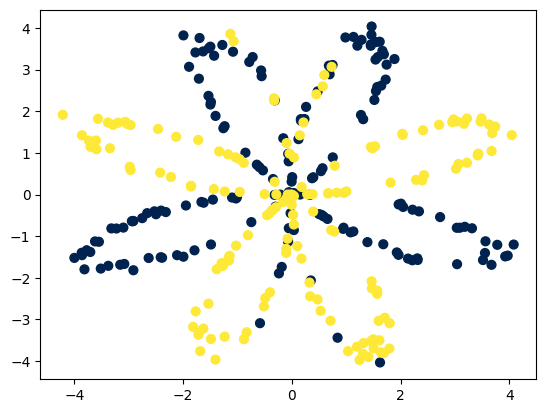

In [8]:
visualize_data(X_train_orig, Y_train_orig)

## preprocess data

In [9]:
# ## CATVSNONCAT DATASET ##
# #########################
# def preprocess_data(X, Y = None):
#     """Preprocess input data, in order to be fed as the input of the neural network.
    
#     Operations:
#         - Reshaping of the arrays to fit the Neural Network Input
#         - Normalization
#     Returns:
#         (X_pp, Y_pp)
        
#         using the following notations:
#         - n_x: number of features in the input of the neural network
#         - m: number of observations 
#         X_pp: normalized matrix of size (n_x, m)
#         Y_pp: normalized array of size (1, m)
#     """
#     m = X.shape[0]

#     ## reshaping
#     X = X.reshape(m, -1).T
#     if Y is not None:
#         Y = Y.reshape(m, 1).T
    
#     ## normalization
#     X = X / 255.
    
#     return X,Y
# ####################
# ####################

In [10]:
## FLOWER DATASET ## 
####################
def preprocess_data(X, Y = None):
    """Preprocess input data, in order to be fed as the input of the neural network.
    """
    # nothing to do, the data is already in the right shape and scale !
    return X, Y
###################
###################

In [11]:
X_train, Y_train = preprocess_data(X_train_orig, Y_train_orig)
X_test, Y_test = preprocess_data(X_test_orig, Y_test_orig)

print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (2, 320)
Y_train shape: (1, 320)
X_test shape: (2, 80)
Y_test shape: (1, 80)


## define the network structure

We want to build a logistic regression, which can be seen as the following 1-layer neural network:

![](../../schemas/schema-LR.png)

In [ ]:
def get_layer_sizes(X):
    """
    Returns the size of each neural network layer.
    
    (n_x, n_y)
    """
    n_x = X.shape[0]
    n_y = 1
    return (n_x, 1)


In [ ]:
n_x, n_y = get_layer_sizes(X_train)
print(f"n_x: {n_x}")
print(f"n_y: {n_y}")

## initialize the parameters

In [ ]:
def initialize_params(n_x, n_y):
    W = np.zeros((n_y, n_x))
    b = np.zeros(n_y)
    params = {
        "W": W,
        "b": b
    }
    return params

In [ ]:
params = initialize_params(n_x, n_y)

In [ ]:
params["W"].shape

## forward propagate

In [ ]:
def forward_propagate(params, X):
    m = X.shape[1]
    W = params["W"]
    b = params["b"]
    A = sigmoid(np.dot(W, X) + b)
    return A

In [ ]:
A = forward_propagate(params, X_train)

## compute the cost

In [ ]:
def compute_cost(A, Y):
    m = A.shape[1]
    cost = -(1/m)*np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))
    return cost

In [ ]:
compute_cost(A, Y_train)

## backward propagate

In [ ]:
def backward_propagate(X, Y, A):
    m = X.shape[1]

    grads = dict()
    grads["dW"] = (1/m) * np.dot((A-Y), X.T)
    grads["db"] = (1/m) * np.sum(A-Y)

    return grads

In [ ]:
grads = backward_propagate(X_train, Y_train, A)

In [ ]:
grads["dW"].shape

## update the parameters

In [ ]:
def update_params(params, grads, learning_rate):
    """Update weights using gradient descent.
    
    Returns:
        - Updated parameters
    """
    W = params["W"]
    b = params["b"]
    dW = grads["dW"]
    db = grads["db"]

    W = W - learning_rate*dW
    b = b - learning_rate*db

    params["W"] = W
    params["b"] = b
    
    return params

In [ ]:
params = update_params(params, grads, 0.01)

## train

In [ ]:
def train(X, Y, nb_iterations, learning_rate):
    
    m = X.shape[1]
    n_x, n_y = get_layer_sizes(X)
    params = initialize_params(n_x, n_y)

    costs = list()

    for i in range(nb_iterations):
        A = forward_propagate(params, X)
        cost = compute_cost(A, Y)
        grads = backward_propagate(X, Y, A)
        params = update_params(params, grads, learning_rate)

        if (i % 100) == 0:# we store the cost each 100 iterations
            costs.append(cost)
    
    return params, costs

In [ ]:
nb_it = 2000
learning_rate = 0.01
params, costs = train(X_train, Y_train, nb_it, learning_rate)

In [ ]:
plt.plot(costs)

## predict

In [ ]:
def predict(params, X, threshold = 0.5):
    A = forward_propagate(params, X)
    Yp = 1*(A >= threshold)
    return Yp

In [ ]:
predict(params, X_train)

## evaluate the performance

In [ ]:
def evaluate_performance(X_train, Y_train, X_test, Y_test, params, print_perf=True):
    Yp_train = predict(params, X_train)
    Yp_test = predict(params, X_test)
    
    acc_train = np.mean(Yp_train == Y_train)
    acc_test = np.mean(Yp_test == Y_test)

    if print_perf:
        print(f'train accuracy: {acc_train:.1%}')
        print(f'test accuracy: {acc_test:.1%}')
        print("")
        
        acc_bs_one = (Y_test == 1).mean()
        acc_bs_zero = (Y_test == 0).mean()
        print('baseline:')
        print(f'test accuracy, model always predicts "1": {acc_bs_one:.1%}')
        print(f'test accuracy, model always predicts "0": {acc_bs_zero:.1%}')
    return acc_train, acc_test

In [ ]:
evaluate_performance(X_train, Y_train, X_test, Y_test, params)

# EXPERIMENTS

## experiment with the learning rate

In [ ]:
def experiment_with_learning_rate(X_train, Y_train, X_test, Y_test, learning_rates, nb_iterations=2000):
    res_cost = dict()
    res_acc = dict() 

    for lr in learning_rates:
        params, costs = train(X_train, Y_train, nb_iterations, lr)
        acc_train, acc_test = evaluate_performance(X_train, Y_train, X_test, Y_test, params, print_perf=False)

        res_cost[lr] = costs
        res_acc[lr] = (acc_train, acc_test)
        
        plt.plot(res_cost[lr], label= lr)
    
    ## display the evolution of the cost
    plt.xlabel = "iteration ( % 100)"
    plt.ylabel = "cost"
    plt.legend(loc='upper center', shadow=True)
    plt.show()

    ## display the accuracy
    for lr in learning_rates:
        print(f'LR = {lr} / train accuracy = {res_acc[lr][0]:.1%}, test accuracy = {res_acc[lr][1]:.1%}')


In [ ]:
learning_rates = [10**-4, 10**-3, 10**-2]
experiment_with_learning_rate(X_train, Y_train, X_test, Y_test, learning_rates)

## load a custom image

! only for cat v noncat dataset


In [ ]:
from PIL import Image

path_img = Path("./data/catvnoncat/cat_11.jpeg")
#path_img = Path("./data/catvnoncat/Cat_March_2010-1.jpeg")

In [ ]:
def load_and_resize_image(path_img, target_size = (64,64)):
    img = Image.open(path_img)
    img = img.resize(target_size)
    X_img = np.array(img)
    X_img = np.expand_dims(X_img, axis=0)
    return X_img

In [ ]:
img = Image.open(path_img)
X_img = load_and_resize_image(path_img)

In [ ]:
## image originelle
img

In [ ]:
## image après resizing
plt.imshow(X_img[0])

In [ ]:
X_img, _ = preprocess_data(X_img)

In [ ]:
predict(X_img, params["W"], params["b"])